In [7]:
###################### IMPORTS ##################3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (15,10)

###################### FUNCTIONS ##################3
def show_losses():
    # Parse the data into a list of lists
    data = [list(map(float, line.split())) for line in losses]
    # data = [np.mean(data[i:(i+1)*5], axis=0) for i in range(len(data)//5)]
    # data = [smooth_losses(loss, window_size=1) for loss in data]
    num_series = len(data)  # Assuming all lines have the same number of values

    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / num_series) for i in range(num_series)]

    for i, values in enumerate(data):
        plt.plot(values, label=f'Series {i+1}', color=colors[i])

    plt.xlabel('Step')
    #plt.ylabel('Round')
    plt.title('Progress chart of LSTM training')
    plt.legend()
    plt.tight_layout()
    plt.show()

def show_foods():    
    # Convert the data to a NumPy array
    data = [list(map(float, line.split())) for line in foods]
    data_array = np.array(data)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(data_array, cmap="YlGnBu", annot=False, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Value'})

    # Create a custom legend
    handles = [heatmap]  # Add the heatmap as a handle to the legend
    #labels = [legend_labels[i] for i in range(len(legend_labels))]
    #@plt.legend(handles=handles, labels=labels, title='Movement')
    #plt.legend()

    plt.title('Food collected')
    plt.xlabel('Step')
    plt.ylabel('Round')
    plt.show()

def show_movements():
    # Convert the data to a NumPy array
    data = [list(map(float, line.split())) for line in movements]
    data_array = np.array(data)

    # Create a heatmap using seaborn
    movement_labels = {0: 'Forward', 1: 'Backward', 2: 'Left', 3: 'Right'}
    plt.figure(figsize=(10, 8))
    plt.imshow(data_array, cmap='viridis', aspect='auto')

    # Adding labels and title
    plt.xlabel('Timestep')
    plt.ylabel('Round')
    plt.title('Movements Over Time')

    # Adding custom ticks and labels
    plt.xticks(np.arange(len(data[0])), range(1, len(data[0]) + 1))
    plt.yticks(np.arange(len(data)), range(1, len(data) + 1))

    # Adding a colorbar with custom labels
    cbar = plt.colorbar(ticks=list(movement_labels.keys()))
    cbar.set_ticklabels(list(movement_labels.values()))
    cbar.set_label('Movement Type')

    #scatter_food_eaten()

    # Display the plot
    #plt.show()


def scatter_food_eaten():
    # Convert the data to NumPy arrays
    movements_data = [list(map(float, line.split())) for line in movements]
    movements_array = np.array(movements_data)

    foods_data = [list(map(float, line.split())) for line in foods]
    foods_array = np.array(foods_data)

    # Create a heatmap using seaborn
    movement_labels = {0: 'Forward', 1: 'Backward', 2: 'Left', 3: 'Right'}
    plt.figure(figsize=(10, 8))
    plt.imshow(movements_array, cmap='viridis', aspect='auto')

    # Adding labels and title
    plt.xlabel('Timestep')
    plt.ylabel('Round')
    plt.title('Movements Over Time')

    # Adding custom ticks and labels
    #plt.xticks(np.arange(len(movements_data[0])), range(1, len(movements_data[0]) + 1))
    #plt.yticks(np.arange(len(movements_data)), range(1, len(movements_data) + 1))

    # Adding a colorbar with custom labels
    cbar = plt.colorbar(ticks=list(movement_labels.keys()))
    cbar.set_ticklabels(list(movement_labels.values()))
    cbar.set_label('Movement Type')

    # Scatter plot for foods when the value is greater than the previous value
    # Initialize an empty legend
    legend_labels = set()

    # Scatter plot for foods for all values
    for i in range(len(foods_data)):
        for j in range(len(foods_data[i])):
            if foods_data[i][j] > 0:
                label = f'Food: {int(foods_data[i][j])}'
                if label not in legend_labels:
                    plt.scatter(j, i, marker='o', color='red', s=foods_data[i][j] * 20, label=label)
                    legend_labels.add(label)
    plt.legend()

    for i in range(len(foods_data)):
        for j in range(1, len(foods_data[i])):
            if foods_data[i][j] > foods_data[i][j-1]:
                plt.scatter(j, i, marker='o', color='red', s=foods_data[i][j] * 20, alpha=0.7)

    # Display the plot
    plt.show()


###################### FUNCTION CALLS ##################

'''
with open(f"./catkin_ws/losses.txt", "r") as file:
    losses = file.readlines()
    show_losses()

with open(f"./catkin_ws/foods.txt", "r") as file:
    foods = [line.strip().replace('\n', '') for line in file.readlines()]
    show_foods()

with open(f"./catkin_ws/movements.txt", "r") as file:
    movements = [line.strip().replace('\n', '') for line in file.readlines()]
    #show_movements(movements, foods)
    scatter_food_eaten()
'''




folder_path = "./catkin_ws/"


def get_data(prefix):
    # List all files in the folder
    all_files = os.listdir(folder_path)

    # Filter files that start with 'res_foods_' and have a number behind it
    filtered_files = [file for file in all_files if file.startswith(prefix) and file[len(prefix)].isdigit()]

    # Sort the filtered files based on the number behind 'res_foods_'
    sorted_files = sorted(filtered_files, key=lambda x: int(x[len(prefix)]))

    # Read the contents of each file into an array
    file_contents_array = []

    for file_name in sorted_files:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            file_contents = file.read()
            file_contents_array.append(file_contents)
        
    return file_contents_array

def smooth_losses(losses, window_size=5):
    smoothed_losses = []
    
    for i in range(len(losses)):
        start_index = max(0, i - window_size + 1)
        end_index = min(len(losses), i + 1)
        window = losses[start_index:end_index]
        smoothed_loss = sum(window) / len(window)
        smoothed_losses.append(smoothed_loss)
    
    return smoothed_losses

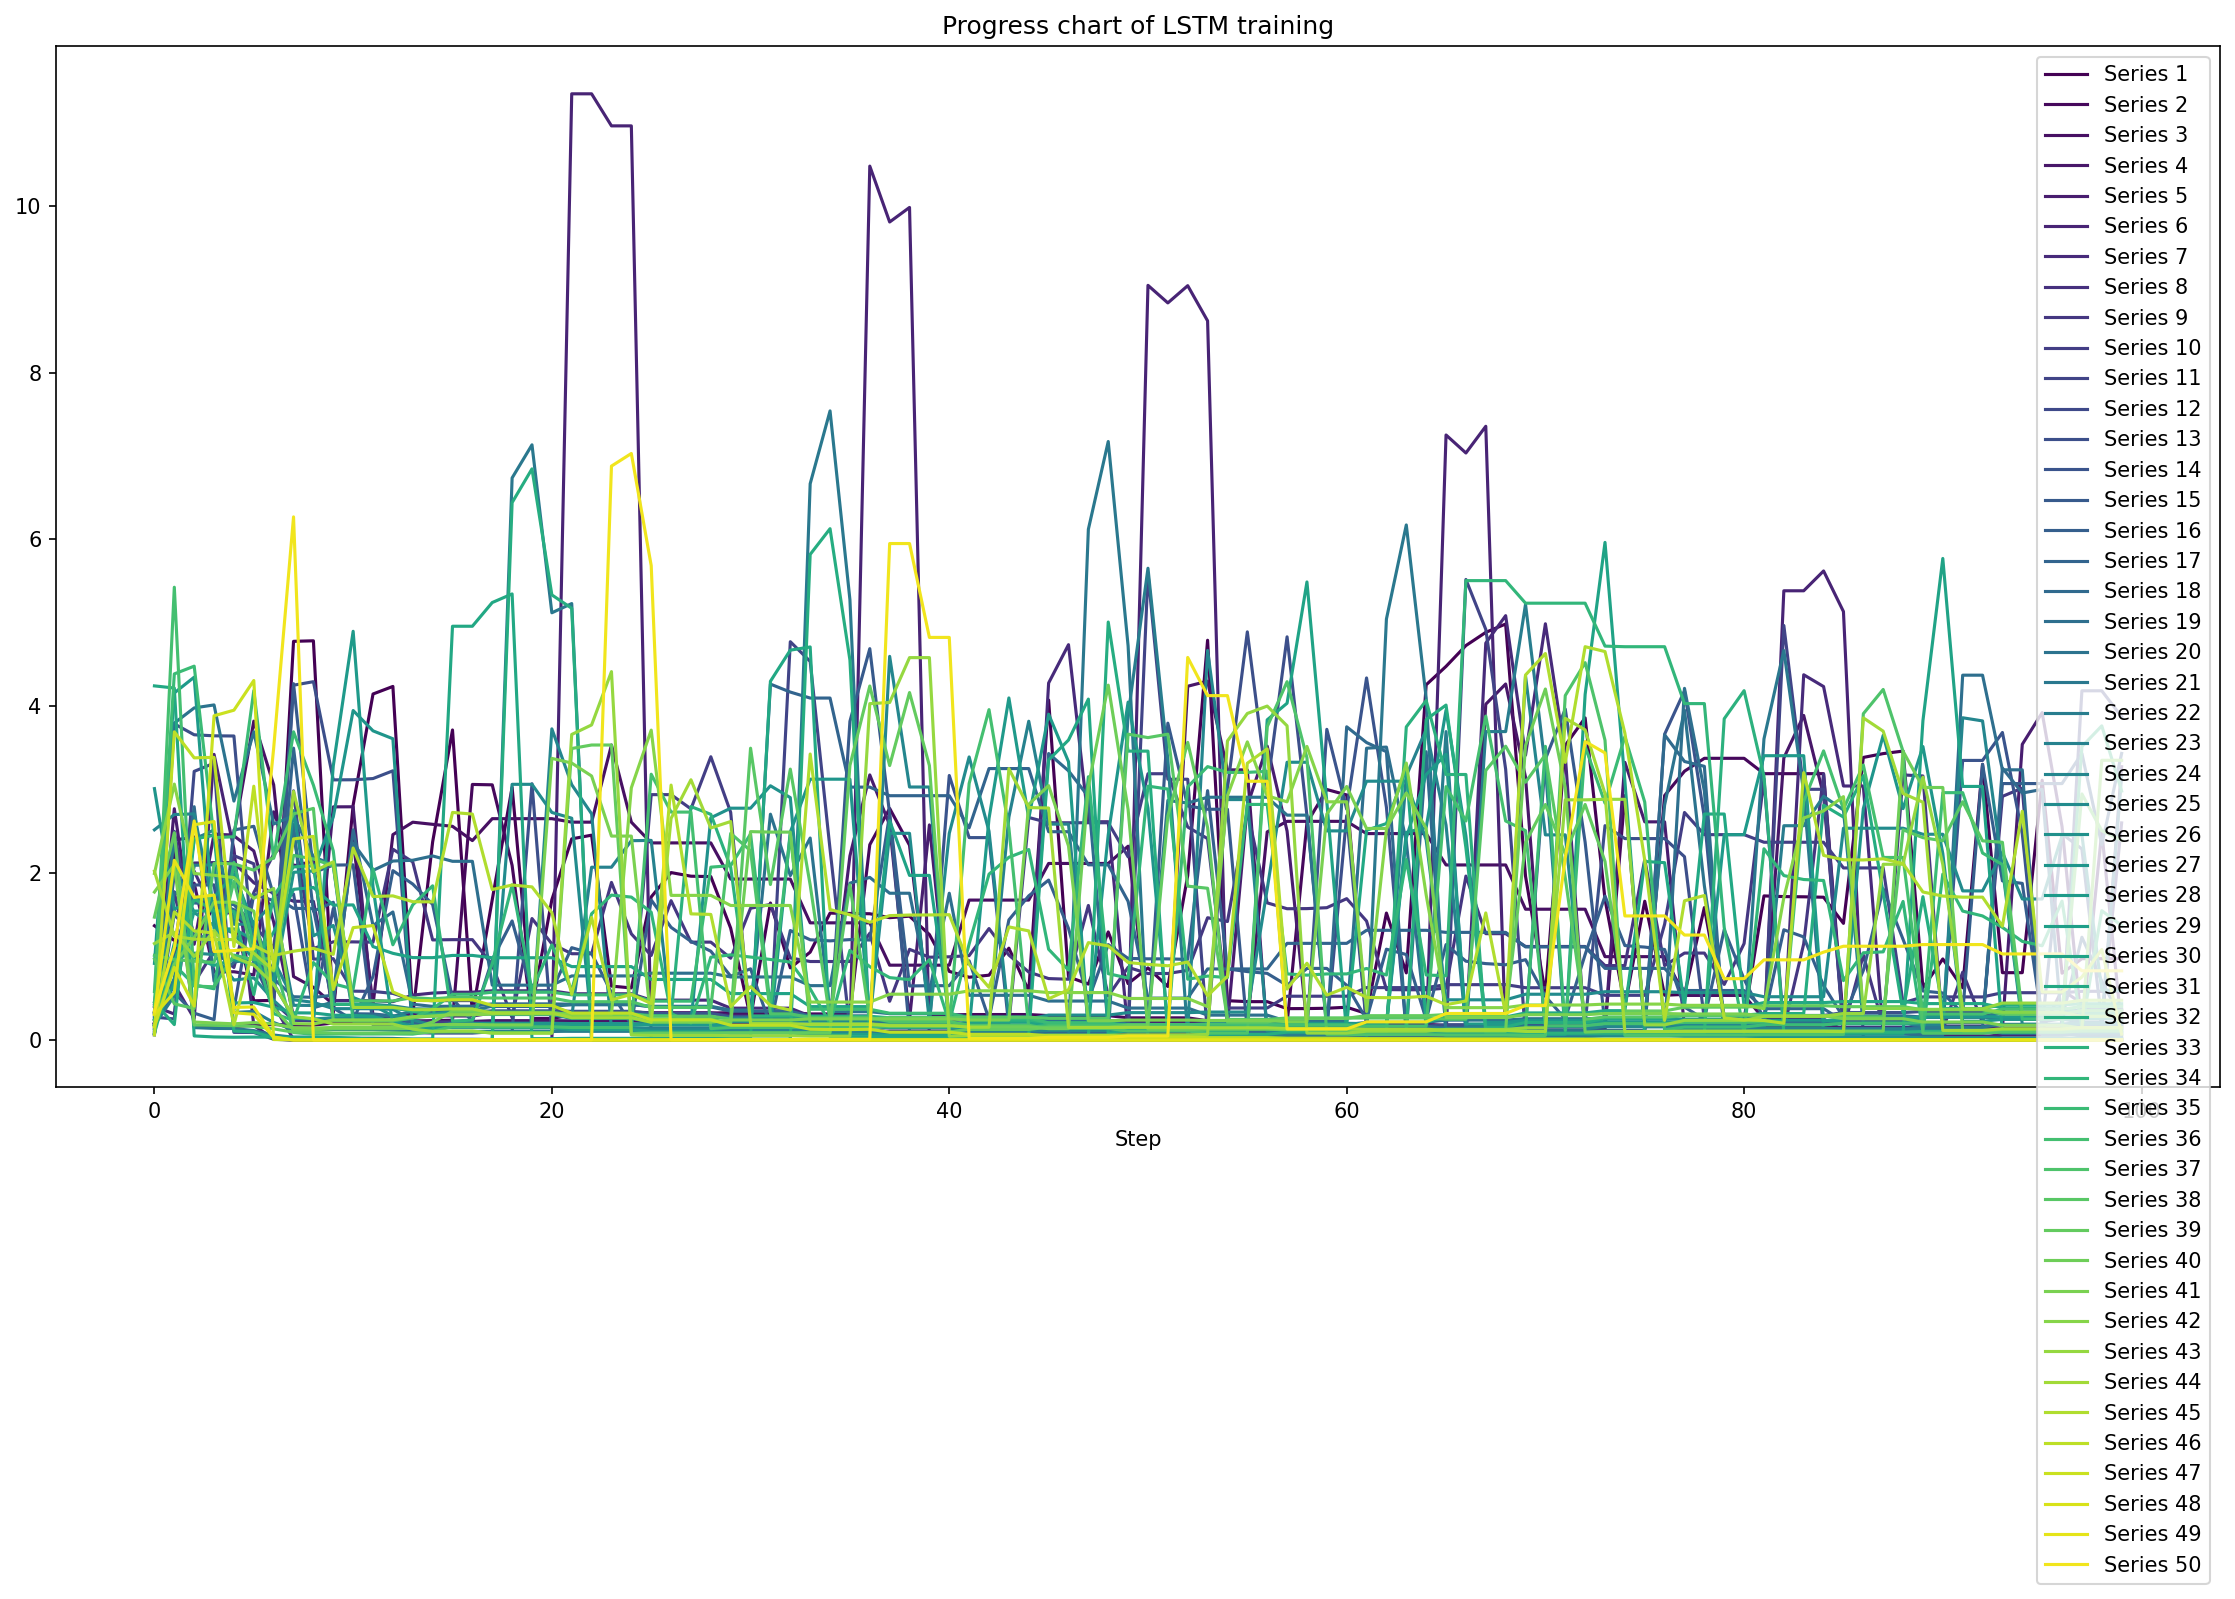

['2 0 3 2 2 1 1 3 1 0 1 3 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 2 2 2 0 2 2 2 1 1 1 2 1 0 2 1 3 1 0 1 2 2 2 1 1 0 2 0 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 0 0 1 2 2 1 2 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2 1 1 2 2', '0 1 1 2 2 2 1 0 1 1 3 1 1 2 2 2 2 2 1 3 1 2 2 2 1 1 1 1 1 1 2 3 2 1 1 1 2 1 1 2 1 3 1 2 1 1 1 0 1 3 1 1 1 2 1 1 3 1 1 1 3 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1', '1 2 0 1 0 3 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 3 1 1 0 1 1 1 1 1 1 2 1 0 3 3 3 1 1 1 3 1 3 0 3 2 0 1 3 3 1 1 3 3 1 1 3 0 1 1 1 1 1 1 2 1 1 1 1 1 3 1 0 1 2 1 1 0 2 1 1 2 2', '3 3 3 1 3 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1', '2 2 3 2 2 2 3 2 3 1 0 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 2 1 1 1 1 2 3 2 2 1 1 1 2 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 

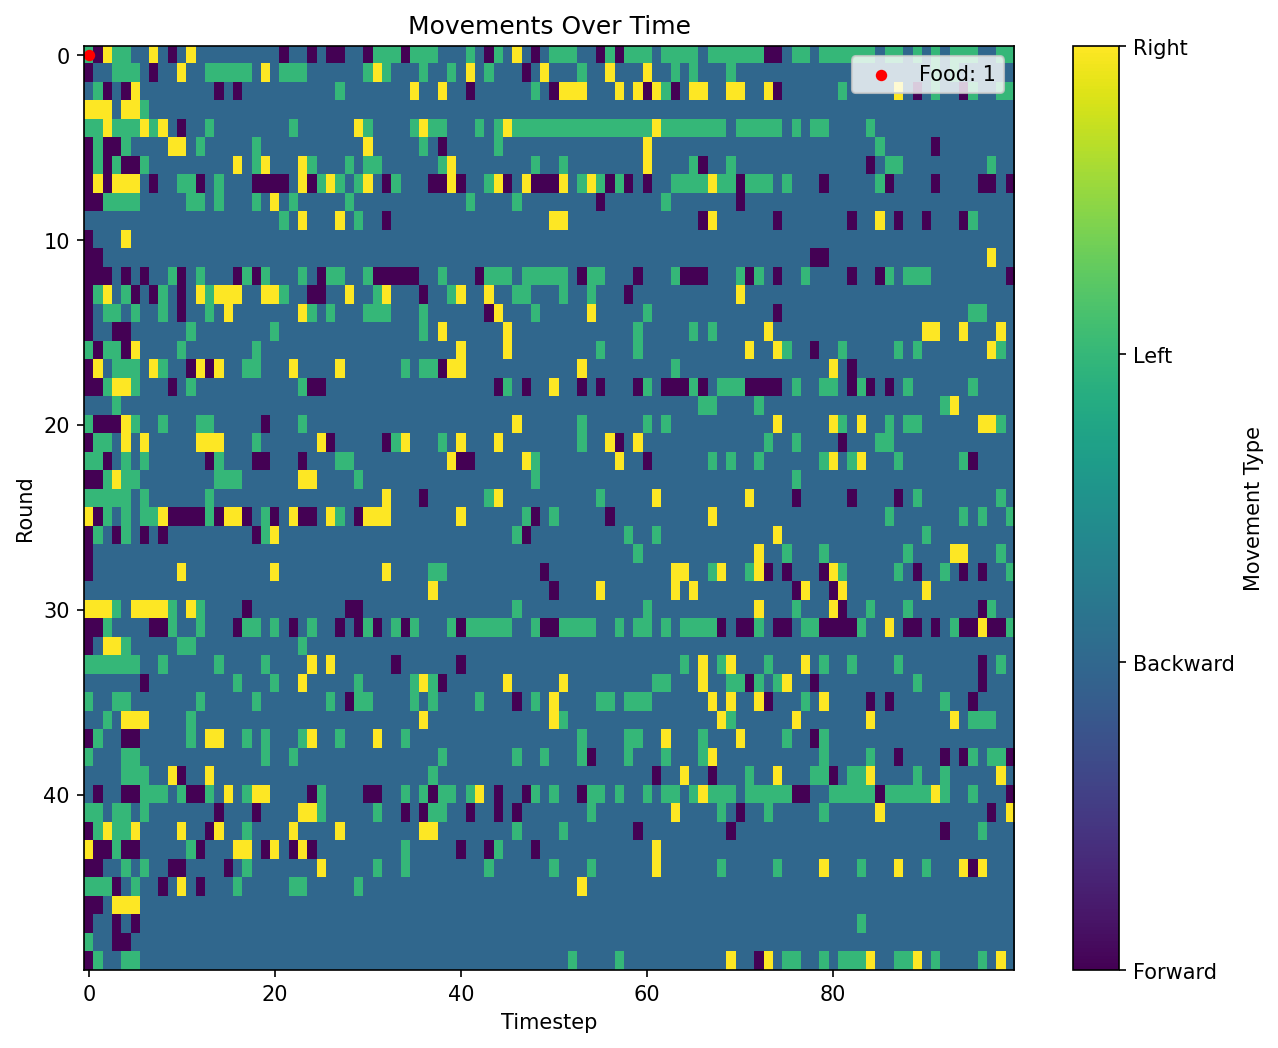

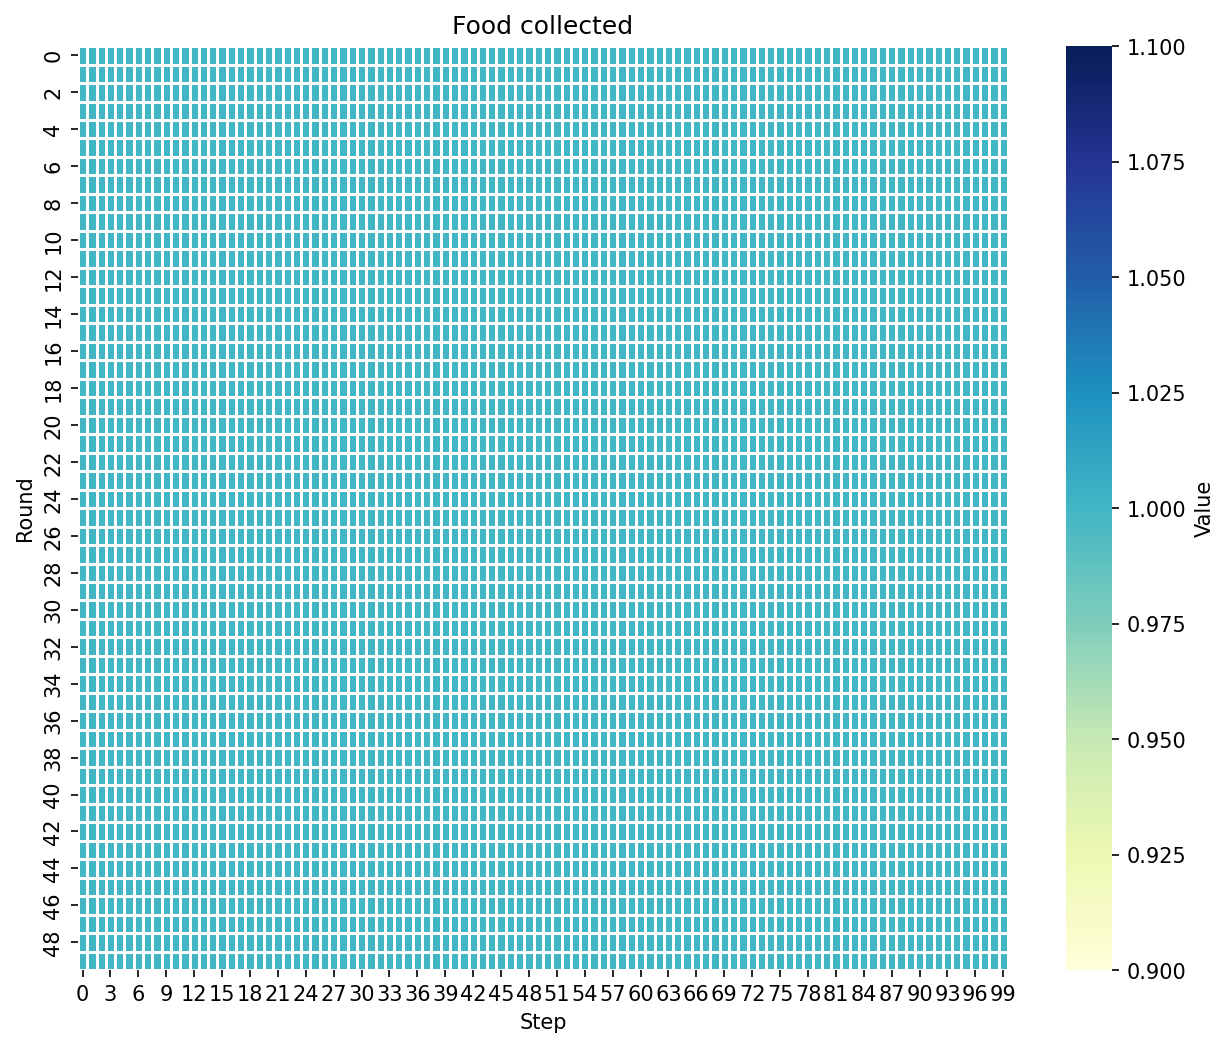

In [8]:
movements = get_data("res_action_")
foods = get_data("res_food_")
losses = get_data("res_loss_")
show_losses()
print(movements)
scatter_food_eaten()
show_foods()